# The Stock Market
## Flipr Hackathon 5.0

### Task 1

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Train_dataset.xlsx')
df_test=pd.read_excel('Test_dataset.xlsx')
df_copy=df.copy()
df_test.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18


In [3]:
df.shape

(7383, 15)

In [4]:
for col in df.columns.unique():
    print(col,'-',df[col].unique().size,'\n')

Stock Index - 7383 

Index - 5 

Industry - 5 

VWAP - 7068 

General Index - 6 

NAV - 5001 

P/E Ratio - 5951 

Volumes Traded - 7114 

Inventory Turnover - 579 

Covid Impact (Beta) - 6 

Tracking Error - 466 

Dollar Exchange Rate - 4 

Put-Call Ratio - 71 

P/B Ratio - 913 

Stock Price - 7383 



In [5]:
df.isna().any()

Stock Index             False
Index                   False
Industry                False
VWAP                     True
General Index            True
NAV                      True
P/E Ratio                True
Volumes Traded           True
Inventory Turnover       True
Covid Impact (Beta)      True
Tracking Error           True
Dollar Exchange Rate     True
Put-Call Ratio           True
P/B Ratio                True
Stock Price             False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           7383 non-null   object 
 1   Index                 7383 non-null   object 
 2   Industry              7383 non-null   object 
 3   VWAP                  7345 non-null   float64
 4   General Index         7321 non-null   float64
 5   NAV                   7322 non-null   float64
 6   P/E Ratio             7149 non-null   float64
 7   Volumes Traded        7115 non-null   float64
 8   Inventory Turnover    6984 non-null   float64
 9   Covid Impact (Beta)   7007 non-null   float64
 10  Tracking Error        7312 non-null   float64
 11  Dollar Exchange Rate  7306 non-null   float64
 12  Put-Call Ratio        7298 non-null   float64
 13  P/B Ratio             7358 non-null   float64
 14  Stock Price           7383 non-null   float64
dtypes: float64(12), objec

In [7]:
df.isnull().sum()

Stock Index               0
Index                     0
Industry                  0
VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64

In [8]:
df['General Index'].unique()

array([12765.84, 38182.08,  3351.28, 11270.15, 55722.  ,      nan])

In [9]:
df['General Index'].value_counts()

11270.15    1485
55722.00    1464
3351.28     1461
12765.84    1458
38182.08    1453
Name: General Index, dtype: int64

In [10]:
df['VWAP'].fillna((df['VWAP'].mean()), inplace=True)
df['NAV'].fillna((df['NAV'].mean()), inplace=True)
df['P/E Ratio'].fillna((df['P/E Ratio'].mean()), inplace=True)
df['Volumes Traded'].fillna((df['Volumes Traded'].mean()), inplace=True)
df['Inventory Turnover'].fillna((df['Inventory Turnover'].mean()), inplace=True)
df['Tracking Error'].fillna((df['Tracking Error'].mean()), inplace=True)
df['Put-Call Ratio'].fillna((df['Put-Call Ratio'].mean()), inplace=True)
df['P/B Ratio'].fillna((df['P/B Ratio'].mean()), inplace=True)

df_test['VWAP'].fillna((df_test['VWAP'].mean()), inplace=True)
df_test['NAV'].fillna((df_test['NAV'].mean()), inplace=True)
df_test['P/E Ratio'].fillna((df_test['P/E Ratio'].mean()), inplace=True)
df_test['Volumes Traded'].fillna((df_test['Volumes Traded'].mean()), inplace=True)
df_test['Inventory Turnover'].fillna((df_test['Inventory Turnover'].mean()), inplace=True)
df_test['Tracking Error'].fillna((df_test['Tracking Error'].mean()), inplace=True)
df_test['Put-Call Ratio'].fillna((df_test['Put-Call Ratio'].mean()), inplace=True)
df_test['P/B Ratio'].fillna((df_test['P/B Ratio'].mean()), inplace=True)

In [11]:
for col in ['General Index','Covid Impact (Beta)','Dollar Exchange Rate']:
    print(col,'\n',df[col].value_counts(),'\n')

General Index 
 11270.15    1485
55722.00    1464
3351.28     1461
12765.84    1458
38182.08    1453
Name: General Index, dtype: int64 

Covid Impact (Beta) 
  0.03    1445
 0.11    1431
 0.23    1389
-0.43    1383
 0.78    1359
Name: Covid Impact (Beta), dtype: int64 

Dollar Exchange Rate 
 74.9    2931
1.0     2912
17.7    1463
Name: Dollar Exchange Rate, dtype: int64 



In [12]:
df=df.fillna(df['General Index'].value_counts().index[0])
df=df.fillna(df['Dollar Exchange Rate'].value_counts().index[0])
df=df.fillna(df['Covid Impact (Beta)'].median())

df_test=df_test.fillna(df_test['General Index'].value_counts().index[0])
df_test=df_test.fillna(df_test['Dollar Exchange Rate'].value_counts().index[0])
df_test=df_test.fillna(df_test['Covid Impact (Beta)'].median())

In [13]:
print(df.isna().any())

print(df_test.isna().any())

Stock Index             False
Index                   False
Industry                False
VWAP                    False
General Index           False
NAV                     False
P/E Ratio               False
Volumes Traded          False
Inventory Turnover      False
Covid Impact (Beta)     False
Tracking Error          False
Dollar Exchange Rate    False
Put-Call Ratio          False
P/B Ratio               False
Stock Price             False
dtype: bool
Stock Index             False
Index                   False
Industry                False
VWAP                    False
General Index           False
NAV                     False
P/E Ratio               False
Volumes Traded          False
Inventory Turnover      False
Covid Impact (Beta)     False
Tracking Error          False
Dollar Exchange Rate    False
Put-Call Ratio          False
P/B Ratio               False
dtype: bool


In [14]:
df_test.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.800000,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.860000,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.930000,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.090000,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,0.938828,6.18


In [15]:
Industry_types=[]
Industry_types=df['Industry'].unique()
print(Industry_types)

['Real Estate' 'Information Tech' 'Materials' 'Healthcare' 'Energy']


In [16]:
one_hot = pd.get_dummies(df['Industry'])
one_hot = one_hot.drop(one_hot.columns[[0]], axis=1)
# Drop column B as it is now encoded
df=df.drop('Industry',axis=1)
df=df.join(one_hot)

one_hot_test = pd.get_dummies(df_test['Industry'])
one_hot_test = one_hot_test.drop(one_hot_test.columns[[0]], axis=1)
# Drop column B as it is now encoded
df_test=df_test.drop('Industry',axis=1)
df_test=df_test.join(one_hot_test)

In [17]:
onehot_index=pd.get_dummies(df['Index'])
onehot_index = onehot_index.drop(onehot_index.columns[[0]], axis=1)
df=df.drop('Index',axis=1)
df=df.join(onehot_index)

onehot_index_test=pd.get_dummies(df_test['Index'])
onehot_index_test = onehot_index_test.drop(onehot_index_test.columns[[0]], axis=1)
df_test=df_test.drop('Index',axis=1)
df_test=df_test.join(onehot_index_test)

In [18]:
df_test.head()

,Stock Index,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Healthcare,Information Tech,Materials,Real Estate,JSE,NSE,NYSE,S&P 500
0,AC3235,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.800000,4.66,0,0,1,0,0,1,0,0
1,AC3236,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.860000,6.11,0,0,0,0,1,0,0,0
2,AC3237,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.930000,4.99,0,1,0,0,0,0,0,1
3,AC3238,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.090000,1.26,1,0,0,0,0,1,0,0
4,AC3239,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,0.938828,6.18,0,0,1,0,0,0,1,0


<AxesSubplot:>

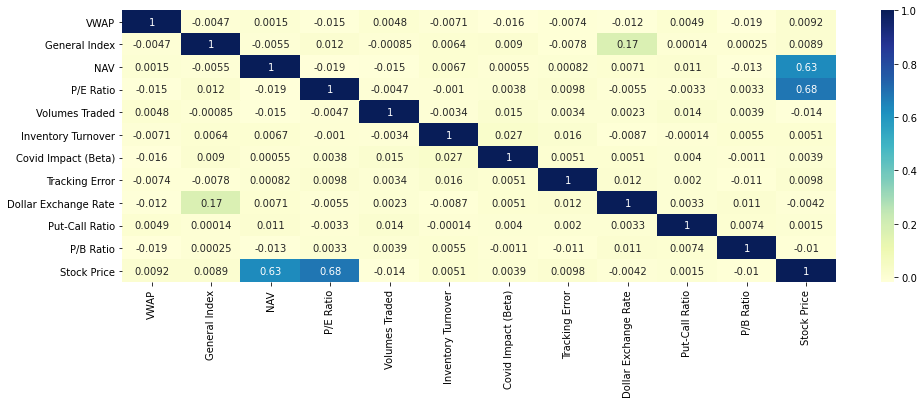

In [19]:
import seaborn as sns
plt.figure(figsize = (16,5))
sns.heatmap(df_copy.corr(), cmap="YlGnBu", annot = True)

In [20]:
from sklearn.linear_model import LinearRegression

y=np.array(df['Stock Price'])
X=np.array(df.drop(['Stock Index','Stock Price'],axis=1))

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=1) 

# create linear regression object 
reg =LinearRegression(n_jobs=-1) 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
print('linear model intercept: {}',format(reg.intercept_))

# regression coefficients 
print('Coefficients: \n', reg.coef_) 


linear model intercept: {} -468.73264057046447
Coefficients: 
 [ 2.46286914e-02 -2.58815930e-03  1.06299836e+01  5.24091660e+00
 -2.33746618e-07 -3.95257816e-01  5.83841310e-04  1.97634539e+02
 -2.57747789e-03 -1.00377362e+01 -8.29355979e-02 -9.36981934e-01
 -1.23503630e+01 -1.49115888e+01 -4.54434336e+00  6.00036544e+01
 -6.48454634e+01 -6.31402179e+01 -8.65253566e+01]


In [21]:
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

Variance score: 0.8694263078296913


In [22]:
print('R-squared score (training): {:.3f}'
     .format(reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(reg.score(X_test, y_test)))

R-squared score (training): 0.860
R-squared score (test): 0.869


In [23]:
x_index=np.array(df_test['Stock Index'])
X_test_data=np.array(df_test.drop(['Stock Index'],axis=1))
print(X_test)

[[3.184200e+02 3.818208e+04 1.251000e+01 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [3.538400e+02 3.818208e+04 6.098000e+01 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [3.911200e+02 1.127015e+04 8.539000e+01 ... 1.000000e+00 0.000000e+00
  0.000000e+00]
 ...
 [4.087700e+02 5.572200e+04 6.169000e+01 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [3.078900e+02 1.276584e+04 5.912000e+01 ... 0.000000e+00 1.000000e+00
  0.000000e+00]
 [4.812600e+02 1.127015e+04 7.434000e+01 ... 1.000000e+00 0.000000e+00
  0.000000e+00]]


In [24]:
y_pred_test=reg.predict(X_test_data)

In [25]:
y_pred_test.size

3331

In [26]:
x_index.size

3331

In [27]:
df_result = pd.DataFrame({'Stock Index':x_index, 'Stock Price':y_pred_test})

In [28]:
df_result.head()

,Stock Index,Stock Price
0,AC3235,861.678892
1,AC3236,428.360072
2,AC3237,1299.602685
3,AC3238,836.170232
4,AC3239,361.610712


In [29]:
df_result.to_excel("flipr_task1.xlsx")

### Task 2

In [30]:
xls = pd.ExcelFile('Test_dataset.xlsx')
df2=pd.read_excel(xls,'Put-Call_TS')

In [31]:
df2.head()

,Stock Index,Put-Call Ratio,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,2020-08-10 00:00:00,2020-08-11 00:00:00,2020-08-12 00:00:00,2020-08-13 00:00:00,2020-08-14 00:00:00,2020-08-15 00:00:00
1,AC3235,0.8,0.66,0.7724,0.983224,0.901211,0.898368
2,AC3236,0.86,0.732,0.85448,1.08664,1.01704,1.02926
3,AC3237,0.93,0.816,0.95024,1.2073,NaN,1.18196
4,AC3238,1.09,1.008,1.16912,1.48309,1.46106,1.531


In [32]:
new_header = df2.iloc[0] #grab the first row for the header
df2 = df2[1:] #take the data less the header row
df2.columns = new_header #set the header row as the df header

In [33]:
df2.head()

,NaT,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15
1,AC3235,0.8,0.66,0.7724,0.983224,0.901211,0.898368
2,AC3236,0.86,0.732,0.85448,1.08664,1.01704,1.02926
3,AC3237,0.93,0.816,0.95024,1.2073,NaN,1.18196
4,AC3238,1.09,1.008,1.16912,1.48309,1.46106,1.531
5,AC3239,NaN,1.104,1.27856,1.62099,1.6155,1.70552


In [34]:
df2.columns = ['Stock Index'] + df2.columns[1:].tolist()

In [35]:
df2.head()

,Stock Index,2020-08-10 00:00:00,2020-08-11 00:00:00,2020-08-12 00:00:00,2020-08-13 00:00:00,2020-08-14 00:00:00,2020-08-15 00:00:00
1,AC3235,0.8,0.66,0.7724,0.983224,0.901211,0.898368
2,AC3236,0.86,0.732,0.85448,1.08664,1.01704,1.02926
3,AC3237,0.93,0.816,0.95024,1.2073,NaN,1.18196
4,AC3238,1.09,1.008,1.16912,1.48309,1.46106,1.531
5,AC3239,NaN,1.104,1.27856,1.62099,1.6155,1.70552


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 1 to 3331
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Stock Index          3331 non-null   object
 1   2020-08-10 00:00:00  2902 non-null   object
 2   2020-08-11 00:00:00  3329 non-null   object
 3   2020-08-12 00:00:00  3274 non-null   object
 4   2020-08-13 00:00:00  3317 non-null   object
 5   2020-08-14 00:00:00  3226 non-null   object
 6   2020-08-15 00:00:00  3092 non-null   object
dtypes: object(7)
memory usage: 182.3+ KB


In [37]:
df2 = df2.set_index(['Stock Index'])

In [38]:
df2.head()

,2020-08-10 00:00:00,2020-08-11 00:00:00,2020-08-12 00:00:00,2020-08-13 00:00:00,2020-08-14 00:00:00,2020-08-15 00:00:00
Stock Index,,,,,,
AC3235,0.8,0.66,0.7724,0.983224,0.901211,0.898368
AC3236,0.86,0.732,0.85448,1.08664,1.01704,1.02926
AC3237,0.93,0.816,0.95024,1.2073,NaN,1.18196
AC3238,1.09,1.008,1.16912,1.48309,1.46106,1.531
AC3239,NaN,1.104,1.27856,1.62099,1.6155,1.70552


<AxesSubplot:>

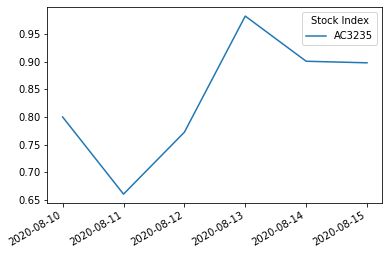

In [39]:
df2.iloc[:1].T.plot()

In [40]:
timeSeries = df2.iloc[:1,:].T

In [41]:
timeSeries

Stock Index,AC3235
2020-08-10 00:00:00,0.8
2020-08-11 00:00:00,0.66
2020-08-12 00:00:00,0.7724
2020-08-13 00:00:00,0.983224
2020-08-14 00:00:00,0.901211
2020-08-15 00:00:00,0.898368


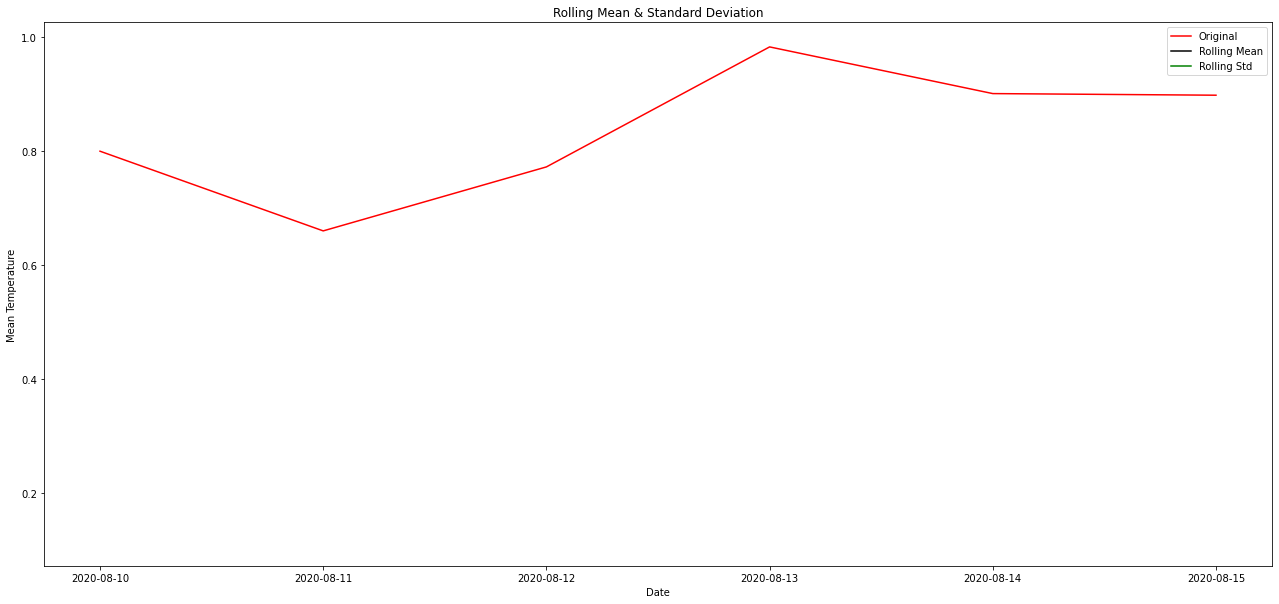

Test statistic:  -1.1512465844745146
p-value:  0.6942090457693091
Critical Values: {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}


In [46]:
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    #rolmean = pd.rolling_mean(ts, window=6)
    rolmean = ts.rolling(6).mean()
    rolstd = ts.rolling(6).std()
    #rolstd = pd.rolling_std(ts, window=6)
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(timeSeries)
check_adfuller(timeSeries.AC3235)
